## Introduction

Image noise is seen in various images thorugh certain pixels within that image, and can be decomposed into different functions of code to either filter out the noise, or filter it in. In this project, we will be focusing on the salt and pepper noise and creating a code to transpose this noise onto the given image. In order to avoid certain parameters from being violated, we must adapt and edit the given image, and then work on its copy. Once this adapted copy is attained, the noise represented by the function `sp_noise (img, p)` can be applied. 

This copy of the image with noise is going to be essential to creating our end result of the image that originally had noise, but by applying certain filters the noise can be used to instead smooth out the image and return what looks like the original image without the noise. One of the filters that will be focused on in this project is the mean filter, 
$$\left(\frac{1}{n}\right)\sum_{i=1}^{n} x_i=m$$

The other filter that will be applied to our image noise is the median filter, which is an extension of the mean filter. These filters will smooth the salt and pepper noise on our image, resulting in an image without any noise on it. These filters take into consideration the pixels within the image, and, with the addition of a border frame, can be adapted to include the pixels of the entire image.

The goal of this report is to create various functions that take into consideration the pixels of an image, and adds the salt and pepper noise to the given image, but instead of removing the image noise it incorporates it into the mean and median filters. These filters will use the noise in the image to blend the pixels together, ultimately resulting in an image that looks identical to the original, but without the noise.

### Part 1

This part of the report includes the application of the salt and pepper noise to a filtered image, in order to differentiate between the black and white parts of the image. Following this filtered image, the application of the salt and pepper image noise can be derived from the function `sp_noise(img, p)`. This function takes into account the rows and columns of a random array with numbers between 0 and 1, and places it on top of the image with the same dimensions. Depending on the numbers in the random array, each pixel will follow certain parameters defined in the function and convert them to either black or white dots on the copy of the original image. This copy will be the focus image for parts 2 and 3 of the project.

In [110]:
import matplotlib.pyplot as plt 
import numpy as np

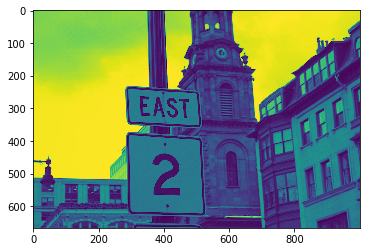

In [111]:
b=plt.imread('boston.png') #Inserts the image into the notebook
bostonbw=b[:,:,1] #Converts the image to variations of the color green to differentiate the salt and pepper noise from the image
plt.imshow(bostonbw)
plt.show()

This is the inserted image in green-scale.

In [112]:
def sp_noise(bostonbw,p): #Defines the image noise function that will add salt and pepper noise to the image.
    c=bostonbw.copy()
    r=np.random.rand(c.shape[0],c.shape[1])
    for row in range(c.shape[0]):
        for col in range(c.shape[1]): 
            if r[row,col] < p/2: 
                c[row,col]=0
            elif r[row,col] > (1-(p/2)): 
                c[row,col]=1
    plt.imshow(c,cmap='gray')
    plt.show()
    return c 

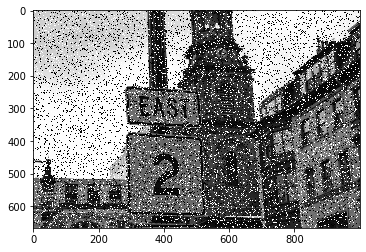

In [113]:
imgnoise=sp_noise(bostonbw,0.2) #Calls on the function given the image and 20% noise contraint

This image includes the salt and pepper noise on the copy of the original image as called on by the `sp_noise(img, p)` function. This copy will be the template image used throughout the rest of the report.

### Part 2

This part of the report includes the application of the mean filter to the copy of the original image with the salt and pepper noise incorporated.

In [114]:
def mean_filter(img,s):
    k=s//2
    bc=img.copy()
    framed=np.ones((bc.shape[0]+(2*k), bc.shape[1]+(2*k))) #Assigns a code that represents the copied image with a frame around the borders.
    framed[k:-k, k:-k]=bc
    for x in range(k,img.shape[0]+k): #x indicates the rows with the frame
        for y in range(k,img.shape[1]+k): #y indicates the columns with the frame
            sliced=framed[x-k:x+(k+1),y-k:y+(k+1)]
            slicedmean=np.mean(sliced) #Applies the mean equation to the function
            bc[x-k,y-k]= slicedmean #Takes the mean of the selected pixels in the filtered image.
    
    return bc

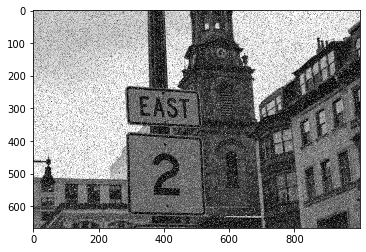

In [115]:
newimg= mean_filter(imgnoise,3) #Calls on the function in relation to the image being used for this report, with the size of the squares used by the filter being 3.
plt.imshow(newimg,cmap='gray')
plt.show()

Returns the image with the function `mean_filter(img, s)` applied to the image with the salt and pepper noise.

### Part 3

This part of the report includes the application of the median filter, using elements from the `mean_filter(img, s)` and applying it to the copy of the original image with the salt and pepper noise incorporated in order to better smooth out the pixels in the image.

In [116]:
def median_filter(img,s):
    k=s//2
    bc=img.copy()
    framed=np.ones((bc.shape[0]+(2*k), bc.shape[1]+(2*k)))
    framed[k:-k, k:-k]=bc
    for x in range(k,img.shape[0]+k): #x is the rows
        for y in range(k,img.shape[1]+k): #y is the columns
            sliced=framed[x-k:x+(k+1),y-k:y+(k+1)]
            slicedmean=np.median(sliced) #Applies the median equation to the function
            bc[x-k,y-k]= slicedmean
    
    return bc

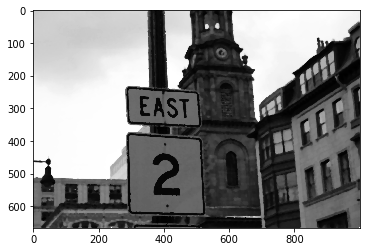

In [117]:
newimg2= median_filter(imgnoise,7) #Calls on the function in relation to the image being used for this report, with size s being the size of squares used by the filter.
plt.imshow(newimg2,cmap='gray')
plt.show()

Returns the image with the function `median_filter(img, s)` applied to the image with the salt and pepper noise.

### Part 4

When reducing the salt and pepper noise in images, it is clear that the `mean_filter(img,s)` and `median_filter(img,s)` functions help in doing so. The mean filter is not as effective in reducing the noise in the image as the median filter is, because the median filter, unlike the mean filter, takes into consideration the shape of the pixels in the square and finds the median value, i.e., the middle value of the numbers arranged from smallest to largest. Since the function incorporates a numpy array, the middle value will be between two numbers, and will therefore have to take the average of the middle numbers. This allows the blend of the pixels to become increasingly smooth with increasing values of s, the size of the square. This increase in smoothness through increasing values of s occurs in the mean filter as well. On the other hand, as the level of noise is increased, the amount of salt and pepper dots in the image increase too, and makes the image less clear. A more effective way of using the mean and median filters would be to incorporate boolean indices to the random numpy array, to make the noise function run more efficiently.

### Part 5

This part introduces a new function that will take into consideration only the black spots of the salt and pepper function, until it reaches a number in which the entire image is filled with black spots. 

In [118]:
def new_noise(img,p):
    c=bostonbw.copy()
    r=np.random.rand(c.shape[0],c.shape[1])
    for row in range(c.shape[0]):
        for col in range(c.shape[1]): 
            if r[row,col] < p/2: 
                c[row,col]=0 #The individual pixels in the rows and columns will return the black spots
    plt.imshow(c,cmap='gray')
    plt.show()

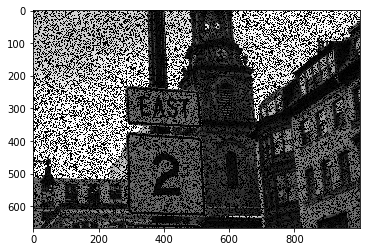

In [119]:
new_noise(bostonbw,0.7)

This image returns the desired image with black spots added to the image. Once this image reaches 2, the individual spots fill up the entire image, ultimately returning a black image. 

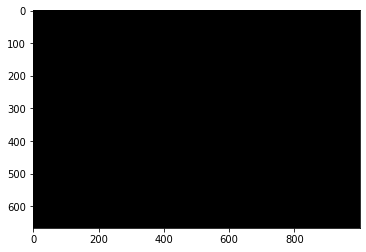

In [120]:
new_noise(bostonbw,2)

As the pixels in the square are all divided by 2, so once the amount of noise in the picture reaches 2, the image will be completely filled with black spots.

## Conclusion

Each individual aspect of this report comes together to return the given image without any noise included at all. The first part introduces the function with the salt and pepper component by converting the inserted image to a greenscale in order to allow the image noise to appear on the black and white image. Following that, the salt and pepper noise is then applied to the functions, `mean_filter(img,p)` and `median_filter(img,p)`, to allow the individual squares of pixels to blend together the noise and produce a clear image, ultimately becoming the original image in black and white. 